In [2]:
# Importações principais
import numpy as np
import matplotlib.pyplot as plt

# Configurações de estilo
np.random.seed(42)

In [4]:
def generate_data(mean0, cov0, mean1, cov1, n_samples=1000):
    X0 = np.random.multivariate_normal(mean0, cov0, n_samples)
    y0 = np.zeros(n_samples, dtype=int)
    X1 = np.random.multivariate_normal(mean1, cov1, n_samples)
    y1 = np.ones(n_samples, dtype=int)
    X = np.vstack([X0, X1])
    y = np.concatenate([y0, y1])
    # Converter labels para -1 e +1
    y = np.where(y == 0, -1, 1)
    return X, y

#exercise 1
mean0 = [1.5, 1.5] 
cov0 = [[0.5, 0], [0, 0.5]]
mean1 = [5, 5]
cov1 = [[0.5, 0], [0, 0.5]]

X, y = generate_data(mean0, cov0, mean1, cov1)

In [5]:
def plot_data(X, y, title='Dados', ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    ax.scatter(X[y==-1,0], X[y==-1,1], color='blue', label='Classe 0')
    ax.scatter(X[y==1,0], X[y==1,1], color='red', label='Classe 1')
    ax.legend()
    ax.set_title(title)
    return ax


In [6]:
class Perceptron:
    def __init__(self, learning_rate=0.01, max_epochs=100):
        self.lr = learning_rate
        self.max_epochs = max_epochs
        self.w = None  # pesos (2D)
        self.b = 0  # bias
        self.history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        
        for epoch in range(self.max_epochs):
            errors = 0
            for xi, yi in zip(X, y):
                if yi * (np.dot(self.w, xi) + self.b) <= 0:
                    self.w += self.lr * yi * xi
                    self.b += self.lr * yi
                    errors += 1
            accuracy = np.mean(np.sign(np.dot(X, self.w) + self.b) == y)
            self.history.append(accuracy)
            if errors == 0:
                break
        return self

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)


In [7]:
def plot_decision_boundary(model, X, y, title='Fronteira de Decisão', ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.2, levels=[-1, 0, 1], colors=['blue','red'])
    ax.scatter(X[y==-1,0], X[y==-1,1], color='blue', label='Classe 0')
    ax.scatter(X[y==1,0], X[y==1,1], color='red', label='Classe 1')
    ax.set_title(title)
    ax.legend()
    return ax

def plot_accuracy(history, title='Acurácia por Época'):
    plt.figure()
    plt.plot(history, marker='o')
    plt.xlabel('Época')
    plt.ylabel('Acurácia')
    plt.title(title)
    plt.grid(True)
    plt.show()


Pesos finais: [0.03687651 0.04482725] Bias: -0.2700000000000001
Acurácia final: 1.0


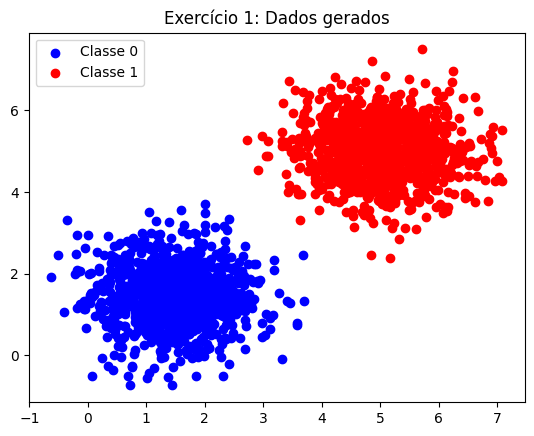

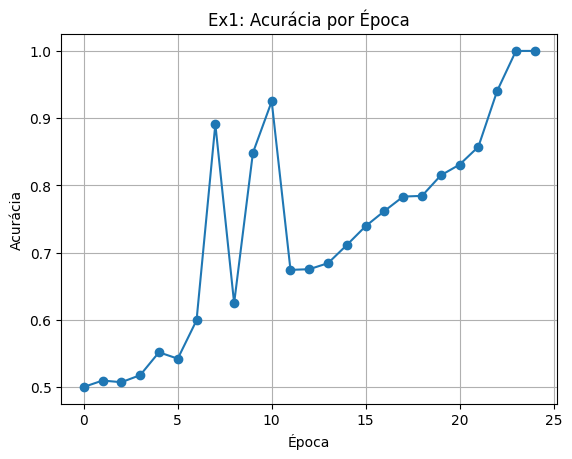

<Axes: title={'center': 'Ex1: Fronteira de Decisão'}>

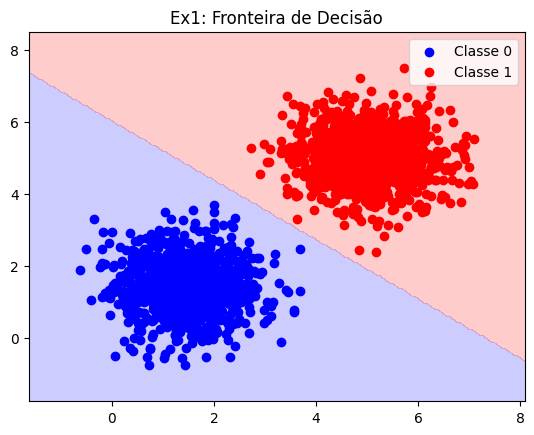

In [8]:
# Gerar dados e visualizar
X1, y1 = generate_data([1.5,1.5], [[0.5,0],[0,0.5]],
                       [5,5], [[0.5,0],[0,0.5]])
plot_data(X1, y1, title='Exercício 1: Dados gerados')

# Treinar Perceptron
p1 = Perceptron(learning_rate=0.01, max_epochs=100)
p1.fit(X1, y1)
print("Pesos finais:", p1.w, "Bias:", p1.b)
print("Acurácia final:", p1.history[-1])
plot_accuracy(p1.history, title='Ex1: Acurácia por Época')
plot_decision_boundary(p1, X1, y1, title='Ex1: Fronteira de Decisão')


Pesos finais: [0.03975727 0.03749485] Bias: -0.060000000000000005
Acurácia final: 0.5015


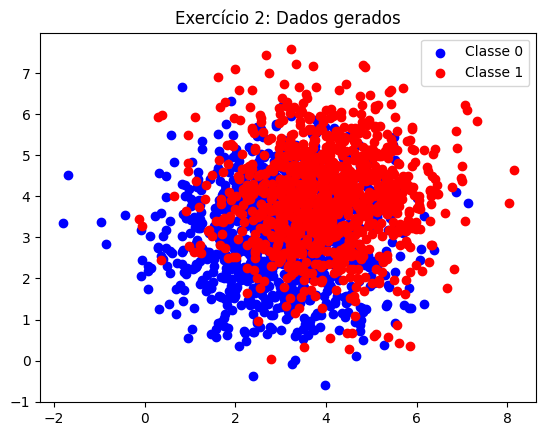

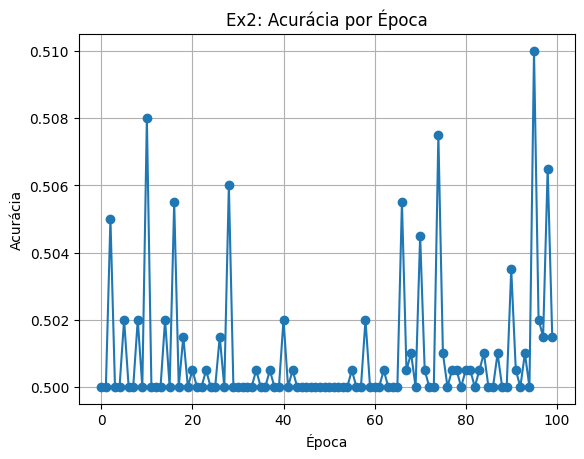

<Axes: title={'center': 'Ex2: Fronteira de Decisão'}>

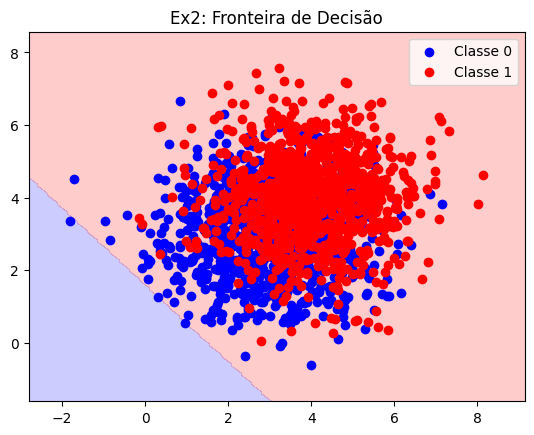

In [9]:
# Gerar dados e visualizar
X2, y2 = generate_data([3,3], [[1.5,0],[0,1.5]],
                       [4,4], [[1.5,0],[0,1.5]])
plot_data(X2, y2, title='Exercício 2: Dados gerados')

# Treinar Perceptron
p2 = Perceptron(learning_rate=0.01, max_epochs=100)
p2.fit(X2, y2)
print("Pesos finais:", p2.w, "Bias:", p2.b)
print("Acurácia final:", p2.history[-1])
plot_accuracy(p2.history, title='Ex2: Acurácia por Época')
plot_decision_boundary(p2, X2, y2, title='Ex2: Fronteira de Decisão')
